1. Load the dataset into a Pandas DataFrame and display the first five rows.

In [29]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv("flipkart_sales.csv")
df.head()

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,12-09-2024,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,18-12-2024,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,18-05-2024,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,08-11-2024,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,27-12-2024,UPI,3.1


2. Check for missing values in the dataset and handle them if any exist.

In [2]:
df.isnull().sum()

Order ID             0
Product Name         0
Category             0
Price (INR)          0
Quantity Sold        0
Total Sales (INR)    0
Order Date           0
Payment Method       0
Customer Rating      0
dtype: int64

In [3]:
df.columns

Index(['Order ID', 'Product Name', 'Category', 'Price (INR)', 'Quantity Sold',
       'Total Sales (INR)', 'Order Date', 'Payment Method', 'Customer Rating'],
      dtype='object')

3. Find the total number of unique products sold.

In [4]:
df["Product Name"].nunique()

25

In [5]:
uni_name= df["Product Name"].nunique()
print(f"unique product Name total count:{uni_name}")

uni_name= df["Product Name"].unique()
len(uni_name)



unique product Name total count:25


25

4. Calculate the total revenue generated from all sales.

In [6]:
total_revenue = df["Total Sales (INR)"].sum()
print(f"Total Revenue : {total_revenue:.2f}")

Total Revenue : 75213112.74


5. Determine the most frequently used payment method.

In [7]:
Most_payment_method = df.groupby("Payment Method").agg({'Order ID':"count"}).sort_values(by="Order ID",ascending=False).head(1)
Most_payment_method

,Order ID
Payment Method,
UPI,176


6. Identify the category with the highest total sales.


'Order ID', 'Product Name', 'Category', 'Price (INR)', 'Quantity Sold',
'Total Sales (INR)', 'Order Date', 'Payment Method', 'Customer Rating'

In [8]:
Highest_total_sales_category = df.groupby("Category").agg({"Total Sales (INR)":"sum"}).sort_values(by="Total Sales (INR)",ascending=False).head(1)
Highest_total_sales_category

,Total Sales (INR)
Category,
Electronics,17307173.07


7. Find the product with the highest number of units sold.


'Order ID', 'Product Name', 'Category', 'Price (INR)', 'Quantity Sold',
'Total Sales (INR)', 'Order Date', 'Payment Method', 'Customer Rating'

In [9]:
highest_number_of_units_sold = df.groupby("Product Name").agg({"Quantity Sold":"count"}).sort_values(by="Quantity Sold",ascending=False).head(1)
highest_number_of_units_sold

,Quantity Sold
Product Name,
Educational Book,64


8. Compute the average customer rating for each product category.

'Order ID', 'Product Name', 'Category', 'Price (INR)', 'Quantity Sold',
'Total Sales (INR)', 'Order Date', 'Payment Method', 'Customer Rating'

In [10]:
# df.groupby("Category").agg({"Customer Rating":"mean","Quantity Sold":"count"})
df.groupby("Category").agg({"Customer Rating":"mean"})

,Customer Rating
Category,
Beauty,2.872396
Books,3.079904
Clothing,2.971429
Electronics,2.988479
Home & Kitchen,3.138860


9. Find the most expensive product and the least expensive product.

In [11]:
most_expensive_product = df.loc[df["Price (INR)"].idxmax(), "Product Name"]
least_expensive_product = df.loc[df["Price (INR)"].idxmin(), "Product Name"]

most_expensive_product, least_expensive_product


('Lipstick', 'Hair Dryer')

10. Identify the order with the highest total sales.

In [12]:
highest_total_sales_order =df.loc[df["Total Sales (INR)"].idxmax(),"Order ID"]
highest_total_sales_order


'ORD00012'

11. Count the number of orders placed per month.

In [13]:

df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")
orders_per_month = df.groupby(df["Order Date"].dt.to_period("M"))["Order ID"].count()

12. Calculate the total revenue generated per category.

In [14]:

revenue_per_category = df.groupby("Category")["Total Sales (INR)"].sum()
revenue_per_category 

Category
Beauty            14680584.05
Books             14785759.65
Clothing          15114386.86
Electronics       17307173.07
Home & Kitchen    13325209.11
Name: Total Sales (INR), dtype: float64

13. Find the average price of products in each category.

In [15]:

avg_price_per_category = df.groupby("Category")["Price (INR)"].mean()
avg_price_per_category

Category
Beauty            24610.456615
Books             23342.025455
Clothing          25185.978519
Electronics       25824.873134
Home & Kitchen    23587.667668
Name: Price (INR), dtype: float64

14. Determine the number of sales made using each payment method.

In [16]:

sales_per_payment_method = df["Payment Method"].value_counts()
sales_per_payment_method

Payment Method
UPI            176
Wallet         172
Debit Card     171
COD            169
Net Banking    166
Credit Card    146
Name: count, dtype: int64

15. Identify the top 5 best-rated products.

In [17]:

top_rated_products = df.nlargest(5, "Customer Rating")[["Product Name", "Customer Rating"]]
top_rated_products

,Product Name,Customer Rating
131,Shampoo,5.0
425,Bedsheet,5.0
722,Comic Book,5.0
768,Lipstick,5.0
995,Smartphone,5.0


16. Calculate the average quantity of products sold per order.

In [18]:

avg_quantity_per_order = df["Quantity Sold"].mean()
avg_quantity_per_order

#or

sum_of_q =df['Quantity Sold'].sum()
count_ord =df["Order ID"].count()
avg_quantity_per_order =sum_of_q / count_ord
avg_quantity_per_order

np.float64(3.097)

17. Find the percentage of total sales contributed by each product category.

In [19]:

sales_percentage_per_category = (revenue_per_category / revenue_per_category.sum()) * 100
sales_percentage_per_category 

Category
Beauty            19.518650
Books             19.658487
Clothing          20.095415
Electronics       23.010845
Home & Kitchen    17.716604
Name: Total Sales (INR), dtype: float64

18. Identify orders where the total sales amount exceeds ₹100,000.

In [20]:

high_value_orders = df[df["Total Sales (INR)"] > 100000]
high_value_orders 

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
6,ORD00007,Sneakers,Clothing,38647.72,3,115943.16,2024-07-04,Wallet,2.0
10,ORD00011,Perfume,Beauty,46409.57,5,232047.85,2025-02-08,UPI,2.3
11,ORD00012,Lipstick,Beauty,48780.78,5,243903.90,2024-04-13,UPI,1.3
17,ORD00018,Perfume,Beauty,44061.25,4,176245.00,2024-04-22,COD,2.5
19,ORD00020,T-Shirt,Clothing,32565.77,5,162828.85,2025-01-06,COD,4.4
...,...,...,...,...,...,...,...,...,...
986,ORD00987,Educational Book,Books,27920.20,5,139601.00,2024-02-14,Wallet,2.7
987,ORD00988,Jacket,Clothing,46055.88,5,230279.40,2024-12-06,COD,4.2
988,ORD00989,Smartwatch,Electronics,49569.30,4,198277.20,2024-05-11,COD,1.2
989,ORD00990,Educational Book,Books,35948.16,5,179740.80,2024-10-30,Wallet,2.5


19. Find the product with the lowest customer rating and suggest possible reasons for its poor rating.

In [21]:

lowest_rated_product = df.nsmallest(1, "Customer Rating")[["Product Name", "Customer Rating"]]
lowest_rated_product 

,Product Name,Customer Rating
74,Sneakers,1.0


20. Extract and analyze seasonal trends in the sales data.

In [22]:
# 20. Extract and analyze seasonal trends in the sales data (Monthly total sales)
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")
monthly_sales_trend = df.groupby(df["Order Date"].dt.to_period("m"))["Total Sales (INR)"].sum()
monthly_sales_trend 

C:\Users\JIGAR\AppData\Local\Temp\ipykernel_19956\1256694660.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  monthly_sales_trend = df.groupby(df["Order Date"].dt.to_period("m"))["Total Sales (INR)"].sum()


Order Date
2024-02    3910477.01
2024-03    6508879.04
2024-04    7334962.92
2024-05    6706004.97
2024-06    4992364.75
2024-07    7637324.95
2024-08    5418893.98
2024-09    6264222.31
2024-10    5702923.37
2024-11    5578535.08
2024-12    6491639.99
2025-01    7160788.17
2025-02    1506096.20
Freq: M, Name: Total Sales (INR), dtype: float64

1. Create a bar chart showing total sales by product category.

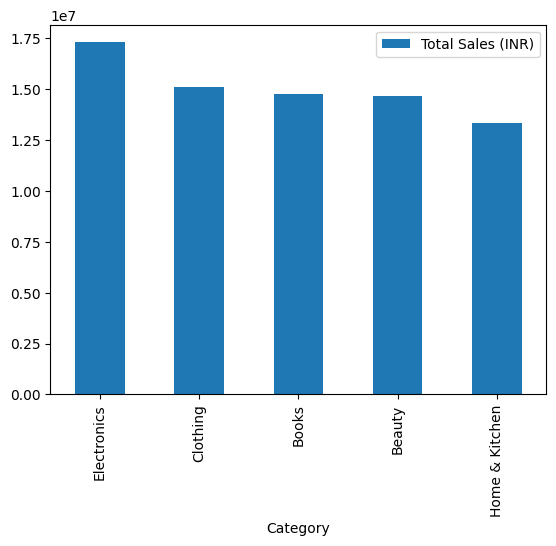

In [23]:

Highest_total_sales_category = df.groupby("Category").agg({"Total Sales (INR)":"sum"}).sort_values(by="Total Sales (INR)",ascending=False).head(5).plot(kind="bar")
Highest_total_sales_category
plt.show()

2. Plot a pie chart of sales distribution by payment method.

In [24]:
df.columns

Index(['Order ID', 'Product Name', 'Category', 'Price (INR)', 'Quantity Sold',
       'Total Sales (INR)', 'Order Date', 'Payment Method', 'Customer Rating'],
      dtype='object')

Text(0.5, 1.0, 'Sales Distribution by Payment Method (Total Sales)')

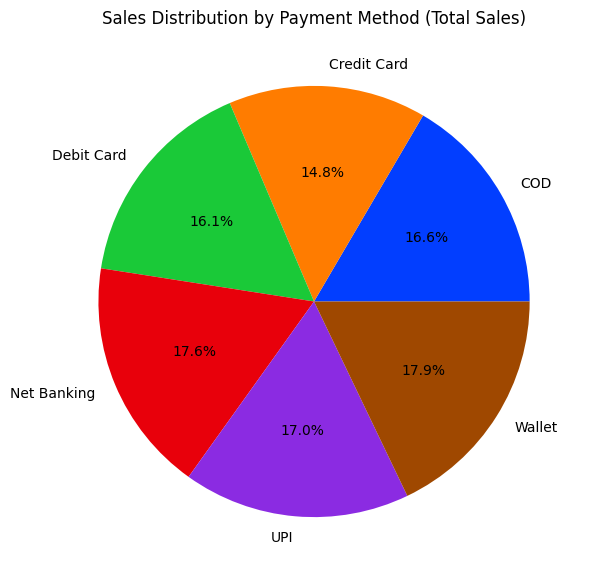

In [25]:
sales_per_payment_method =df.groupby('Payment Method')['Total Sales (INR)'].sum()
plt.figure(figsize=(7, 7))
plt.pie(sales_per_payment_method,labels=sales_per_payment_method.index,autopct="%1.1f%%",
        colors=sns.color_palette('bright'))
plt.title("Sales Distribution by Payment Method (Total Sales)")



3. Generate a line chart to show the monthly trend of total sales.

C:\Users\JIGAR\AppData\Local\Temp\ipykernel_19956\1030001991.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  orders_per_month = df.groupby(df["Order Date"].dt.to_period("m"))['Total Sales (INR)'].sum()


<Axes: xlabel='Order Date'>

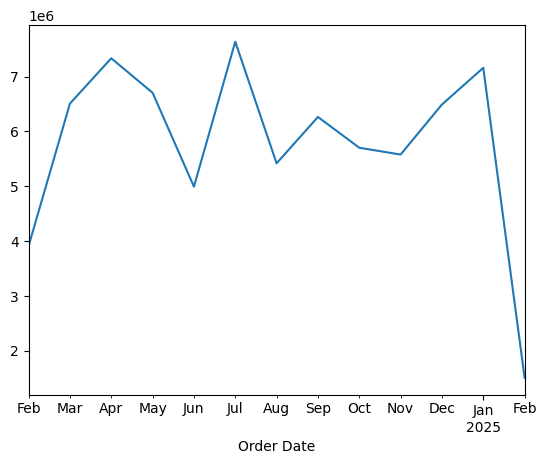

In [26]:


df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")
orders_per_month = df.groupby(df["Order Date"].dt.to_period("m"))['Total Sales (INR)'].sum()
orders_per_month.plot(kind="line",stacked=True)

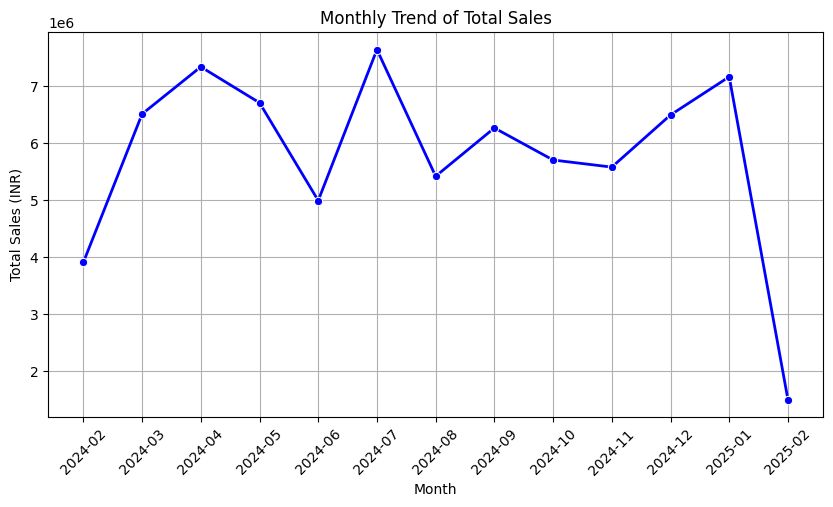

In [27]:

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales_trend.index.astype(str), y=monthly_sales_trend.values, marker="o", color="b", linewidth=2)
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.title("Monthly Trend of Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


4. Create a scatter plot showing price vs. quantity sold for all products.

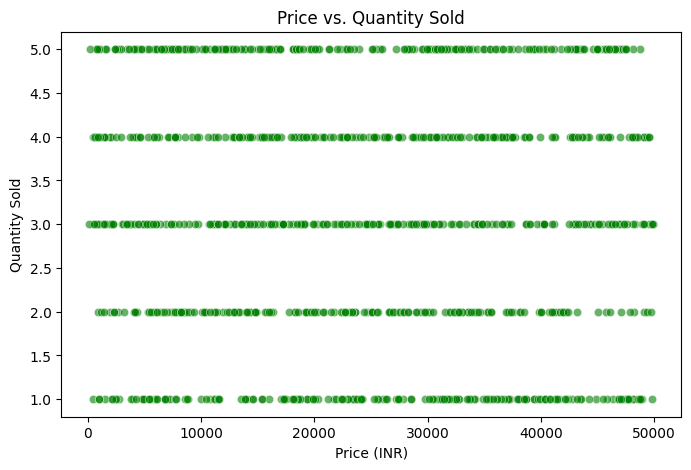

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Price vs. Quantity Sold
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Price (INR)"], y=df["Quantity Sold"], alpha=0.6, color="g")

# Labels and title
plt.xlabel("Price (INR)")
plt.ylabel("Quantity Sold")
plt.title("Price vs. Quantity Sold")

# Show the plot
plt.show()


5. Use a box plot to analyze the spread of customer ratings for different product categories.

C:\Users\JIGAR\AppData\Local\Temp\ipykernel_16316\3869612976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Category"], y=df["Customer Rating"], palette="coolwarm")


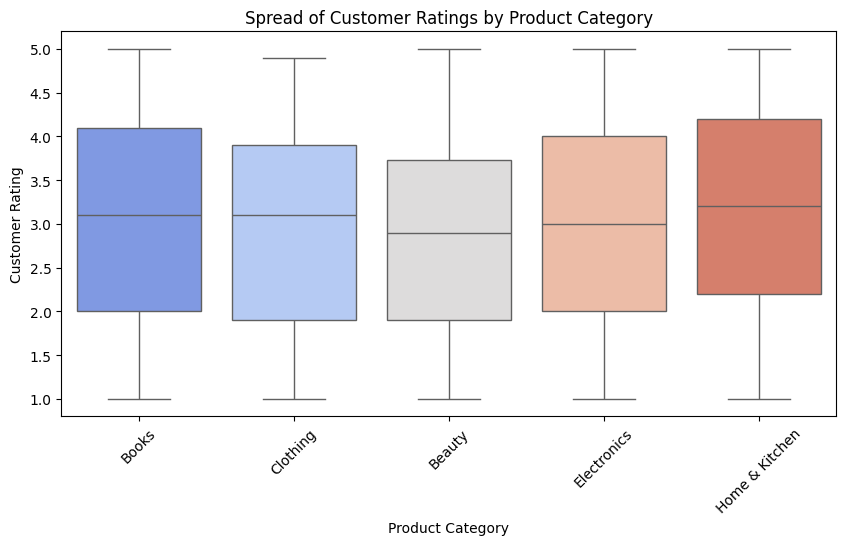

In [ ]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Category"], y=df["Customer Rating"], palette="coolwarm")
plt.xlabel("Product Category")
plt.ylabel("Customer Rating")
plt.title("Spread of Customer Ratings by Product Category")
plt.xticks(rotation=45)
plt.show()


6. Develop a heatmap to visualize the correlation between price, quantity sold, and customer rating.

                 Price (INR)  Quantity Sold  Customer Rating
Price (INR)         1.000000      -0.036321         0.008418
Quantity Sold      -0.036321       1.000000        -0.015227
Customer Rating     0.008418      -0.015227         1.000000


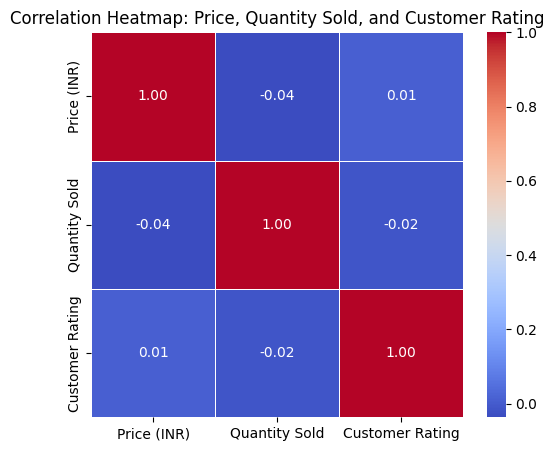

In [ ]:

plt.figure(figsize=(6, 5))
corr_matrix = df[["Price (INR)", "Quantity Sold", "Customer Rating"]].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap: Price, Quantity Sold, and Customer Rating")
plt.show()


7. Plot a stacked bar chart comparing sales revenue by payment method and category.

<Figure size 1000x600 with 0 Axes>

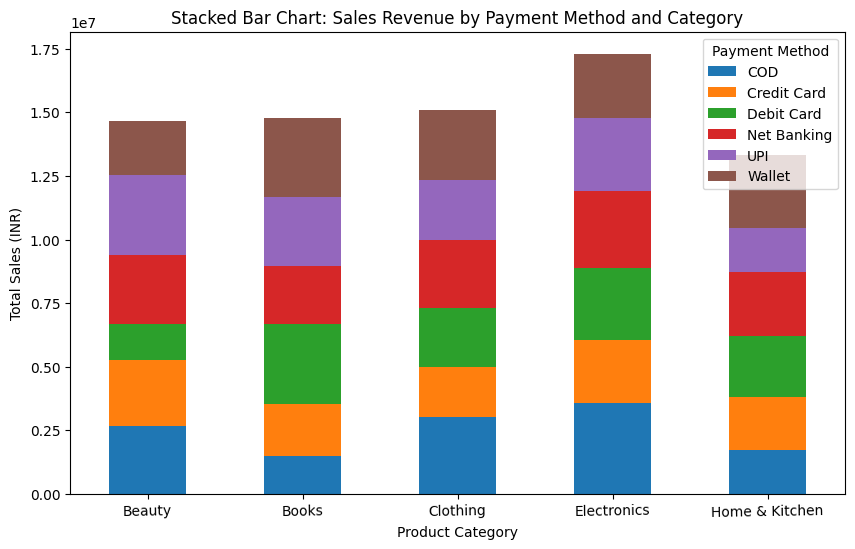

In [ ]:

plt.figure(figsize=(10, 6))
category_payment_sales = df.groupby(["Category", "Payment Method"])["Total Sales (INR)"].sum().unstack()
category_payment_sales.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Product Category")
plt.ylabel("Total Sales (INR)")
plt.title("Stacked Bar Chart: Sales Revenue by Payment Method and Category")
plt.xticks(rotation=1)
plt.legend(title="Payment Method")
plt.show()




8. Create a histogram showing the distribution of order amounts.


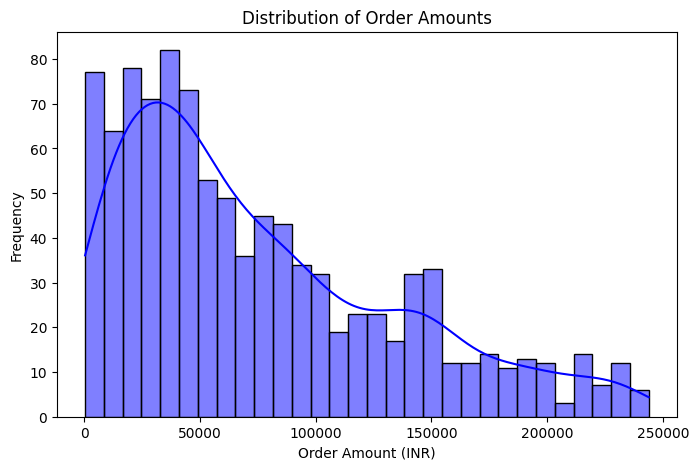

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Total Sales (INR)"], bins=30, kde=True, color="blue")
plt.xlabel("Order Amount (INR)")
plt.ylabel("Frequency")
plt.title("Distribution of Order Amounts")
plt.show()

9. Generate a grouped bar chart showing total revenue for the top 5 highest-selling products.

C:\Users\JIGAR\AppData\Local\Temp\ipykernel_19956\1605553341.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




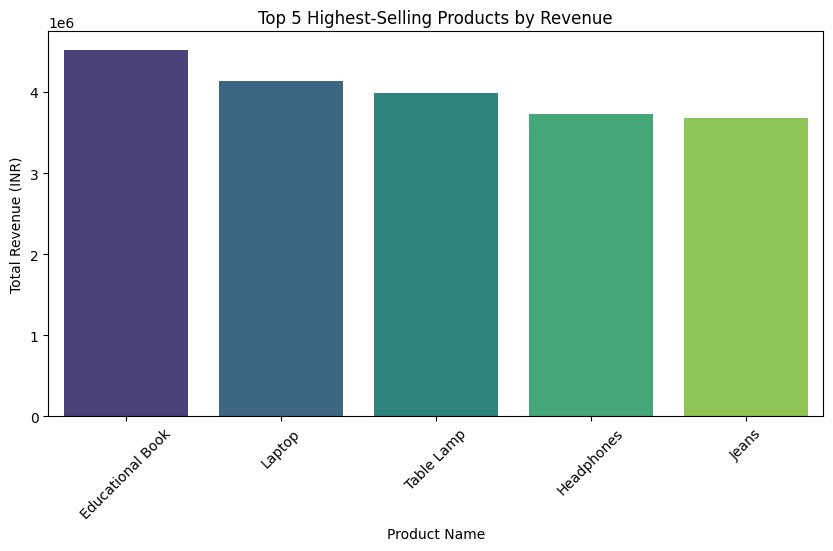

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 highest-selling products by total sales
top_5_products = df.groupby("Product Name")["Total Sales (INR)"].sum().nlargest(5)

# Plot grouped bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_products.index, y=top_5_products.values, palette="viridis")

# Labels and title
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (INR)")
plt.title("Top 5 Highest-Selling Products by Revenue")
plt.xticks(rotation=45)
plt.show()


10. Create an interactive dashboard in Plotly showing key insights like revenue, quantity sold, and
customer rating per category.

In [35]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Aggregate data: Revenue, Quantity Sold, and Avg Rating per Category
category_summary = df.groupby("Category").agg({
    "Total Sales (INR)": "sum",
    "Quantity Sold": "sum",
    "Customer Rating": "mean"
}).reset_index()

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1("Flipkart Sales Dashboard", style={"textAlign": "center"}),

    # Revenue Bar Chart
    dcc.Graph(
        figure=px.bar(category_summary, x="Category", y="Total Sales (INR)", 
                      title="Total Revenue by Category", color="Total Sales (INR)",
                      color_continuous_scale="viridis")
    ),

    # Quantity Sold Bar Chart
    dcc.Graph(
        figure=px.bar(category_summary, x="Category", y="Quantity Sold",
                      title="Total Quantity Sold by Category", color="Quantity Sold",
                      color_continuous_scale="blues")
    ),

    # Customer Rating Box Plot
    dcc.Graph(
        figure=px.box(df, x="Category", y="Customer Rating",
                      title="Customer Rating Distribution by Category", color="Category")
    )
])

# Run the app
if __name__ == '__main__':
    app.run(debug=True)
